# 支持向量机
建议参考以下文章分析和推导比较清晰
https://www.ibm.com/developerworks/cn/analytics/library/machine-learning-hands-on1-svn/index.html

支持向量是距离分类超平面近的那些点，SVM 的思想就是使得支持向量到分类超平面的间隔最大化。出发点很容易理解，距离分类超平面近的那些点到该超平面的间隔最大化代表了该超平面对两类数据的区分度强，不容易出现错分的情况。

### 最大化间隔
    （1）向量的内积：一个向量投影到另一个向量投影长度与向量的范数的乘积，也就是对应坐标相乘再相加。
    （2）目标函数要使得θ尽可能小，这时只要使得x在θ上的投影尽可能的大，就能够在θ取越小的值时满足约束条件，这就是SVM背后的数学原理。
    （3）θ和边界呈现90°垂直，另外θ0为零时边界通过原点，反之不通过原点。

### SMO算法
由于目标变量中自变量 alpha 有 N 个，为了便与求解，每次选出一对自变量 alpha，然后求目标函数关于其中一个 alpha 的偏导，这样就可以得到这一对 alpha 的新值。给这一对 alpha 赋上新值，然后不断重复选出下一对 alpha 并执行上述操作，直到达到最大迭代数或没有任何自变量 alpha 再发生变化为止，这就是 SMO 的基本思想。说直白些，SMO 就是在约束条件下对目标函数的优化求解算法。

### 核函数(kernel) 使用
使用核函数：可以将数据从某个特征空间到另一个特征空间的映射。（通常情况下：这种映射会将低维特征空间映射到高维空间。）

它能将数据从某个很难处理的形式转换成为另一个较容易处理的形式。经过空间转换后：低维需要解决的非线性问题，就变成了高维需要解决的线性问题。

SVM 优化特别好的地方，在于所有的运算都可以写成内积(inner product: 是指2个向量相乘，得到单个标量 或者 数值)；内积替换成核函数的方式被称为核技巧(kernel trick)或者核"变电"(kernel substation)

核函数并不仅仅应用于支持向量机，很多其他的机器学习算法也都用到核函数。最流行的核函数：径向基函数(radial basis function)
径向基函数的高斯版本

### SVM 算法特点
优点：泛化（由具体的、个别的扩大为一般的，就是说：模型训练完后的新样本）错误率低，计算开销不大，结果易理解。

缺点：对参数调节和核函数的选择敏感，原始分类器不加修改仅适合于处理二分类问题。
使用数据类型：数值型和标称型数据。

### SVM与LR（逻辑回归）
#### 相同点:
LR和SVM都是分类算法
LR和SVM都是监督学习算法。
LR和SVM都是判别模型。
如果不考虑核函数，LR和SVM都是线性分类算法，也就是说他们的分类决策面都是线性的。
说明:LR也是可以用核函数的.但LR通常不采用核函数的方法.(计算量太大)

#### 不同点
1、LR采用log损失，SVM采用合页(hinge)损失。

逻辑回归方法基于概率理论，假设样本为1的概率可以用sigmoid函数来表示，然后通过极大似然估计的方法估计出参数的值(基于统计的,其损失函数是人为设定的凸函数) 。
支持向量机基于几何间隔最大化原理，认为存在最大几何间隔的分类面为最优分类面.(有严格的推导)

2、LR对异常值敏感，SVM对异常值不敏感(抗燥能力,SVM要强)。支持向量机只考虑局部的边界线附近的点，而逻辑回归考虑全局（远离的点对边界线的确定也起作用，虽然作用会相对小一些）。LR模型找到的那个超平面，是尽量让所有点都远离他，而SVM寻找的那个超平面，是只让最靠近中间分割线的那些点尽量远离，即只用到那些支持向量的样本。


3、计算复杂度不同。对于海量数据，SVM的效率较低，LR效率比较高。 对于两者在feature和样本数量不同的情况下的效率问题,

4、对非线性问题的处理方式不同，LR主要靠特征构造，必须组合交叉特征，特征离散化。
SVM也可以这样，还可以通过kernel(因为只有支持向量参与核计算,计算复杂度不高)。(由于可以利用核函数,。SVM则可以通过对偶求解高效处理。LR则在特征空间维度很高时，表现较差。)

5、SVM的损失函数就自带正则！！！（损失函数中的1/2||w||^2项），这就是为什么SVM是结构风险最小化算法的原因！！！而LR必须另外在损失函数上添加正则项！！！


#### 逻辑回归和支持向量机的选择：

1.相比于样本数m，特征数n大的多的时候，没有那么多数据量去训练一个非常复杂的模型，这时考虑用SVM。

2.如果n较小，而且m大小中等，例如n在1-1000之间，而m在10-1000之间，使用高斯函数的支持向量机。

3.如果n较小，而m较大，例如n在1-1000之间，而m大于50000，则使用支持向量机会非常慢，解决方案是创造增加更多的特征，然后使用逻辑回归或不带核函数的支持向量机。

神经网络在以上三种情况下都可以有较好的表现，但神经网络训练可能非常慢，选择支持向量机的原因主要在于它的代价函数是凸函数，不存在局部最小值。

### 实例

以Iris兰花数据集为例子：

In [21]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.colors import ListedColormap

#### 1.加载数据

In [22]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

#### 2.对数据进行标准化处理

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

#### 3.图形化显示数据

In [24]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

#### 4.

In [26]:
import matplotlib.font_manager as fm ###便于中文显示
myfont = fm.FontProperties(fname='/home/hadoop/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/simhei.ttf')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


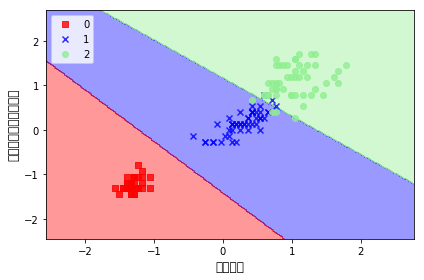

In [30]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_std, y)

plot_decision_regions(X_std, y,classifier=svm)
plt.xlabel(u'花萼长度',size=12)
plt.ylabel("标准化处理后花瓣宽度",size=12)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_std, y, random_state=1, train_size=0.6)
svm.fit(x_train, y_train.ravel())
print(svm.score(x_train, y_train))  # 精度
y_hat = svm.predict(x_train)
print(svm.score(x_test, y_test))
y_hat2 = svm.predict(x_test)

#### 5. 如何调整SVM参数
5.1 kernel：我们之前已经讨论过这个问题。Kernel参数中具有多个可选项：“linear”，“rbf”和“poly”等（默认值是“rbf”）。其中 “rbf”和“poly”通常用于拟合非线性超平面。
当变量个数比较大时（大于1000），我建议你最好使用线性核估计，因为在高维空间中数据大多是线性可分的。当然你也可以利用 rbf 核估计，不过你必须使用交叉验证调整参数从而避免过度拟合。

5.2gamma：gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。

5.3 C：误差项的惩罚参数。我们可以通过调节该参数达到平衡分割边界的平滑程度和分类准确率的目的。

我们应该经常关注交叉验证结果从而有效地利用这些参数的组合避免过度拟合情况的问题。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


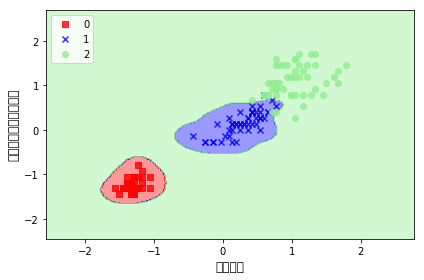

In [32]:
svm = SVC(kernel='rbf', C=1.0, gamma=20, random_state=0)
svm.fit(X_std, y)

plot_decision_regions(X_std, y,classifier=svm)
plt.xlabel(u'花萼长度',size=12)
plt.ylabel("标准化处理后花瓣宽度",size=12)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()